# Experiments on Probability Density Functions
### Main document (Figure 2)

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import scipy.stats as stats
import pandas as pd

import qclib.state_preparation.util.baa as baa

x = np.linspace(0, 20, 128) # discretization points
s = x[1]-x[0] # step unit
d = s * 0.5   # delta


In [40]:
perth_data = {}
pdf_names = ['lognormal', 'laplace', 'semicircular', 'normal']

for pdf in pdf_names:
    perth_data[pdf] = pd.read_csv(
        'data/'+pdf+'_perth_7qubits.txt', skiprows=2, header=None, delim_whitespace=True, index_col=[0],
        names=['max_fidelity_loss'] + [f'probability_measure_{i}' for i in range(2**7)]
    )

In [5]:
def plot_ideal(node, pmf, pdf_name, text):
    plt.rcParams["font.family"] = "Times New Roman"
    fig = plt.figure(figsize=(10, 10))

    plt.plot(x, pmf, label='fidelity=1.0')
    plt.plot(x, node.state_vector()**2, label='fidelity='+str(round(1-node.total_fidelity_loss,4)))
    plt.xticks(fontsize=24)
    plt.yticks(fontsize=24)
    plt.legend(fontsize=24)
    plt.savefig(f'save/{pdf_name}{text}.pdf')

def plot_noisy(labels, averages, pdf_name, text):
    plt.rcParams["font.family"] = "Times New Roman"
    fig = plt.figure(figsize=(10, 10))
    for i, avg in enumerate(averages):
        y = avg
        x = np.linspace(0, 20, len(y))
        if i == 0: # ideal
            plt.plot(x, y, label=labels[i], linestyle=(0,(5,5)), color='black')
        else:
            plt.plot(x, y, label=labels[i])
    plt.xticks(fontsize=24)
    plt.yticks(fontsize=24)
    plt.legend(fontsize=24)
    plt.savefig(f'save/{pdf_name}{text}.pdf')
    plt.show()

In [21]:
def experiment_ideal(pmf, pdf_name, text):
    state = np.sqrt(pmf)
    state = state / np.linalg.norm(state)

    node_1 = baa.adaptive_approximation(state, use_low_rank=True, max_fidelity_loss=0.02, strategy='brute_force')

    plot_ideal(node_1, pmf, pdf_name, text)

def experiment_noisy(pmf, pdf_name, text):
    labels   = [ 'ideal', 'exact', 'approx.' ]
    averages = [ pmf ]
    for row in perth_data[pdf_name].itertuples():
        averages.append(np.array(row)[1:])

    plot_noisy(labels, averages, pdf_name, text)

# Log-normal

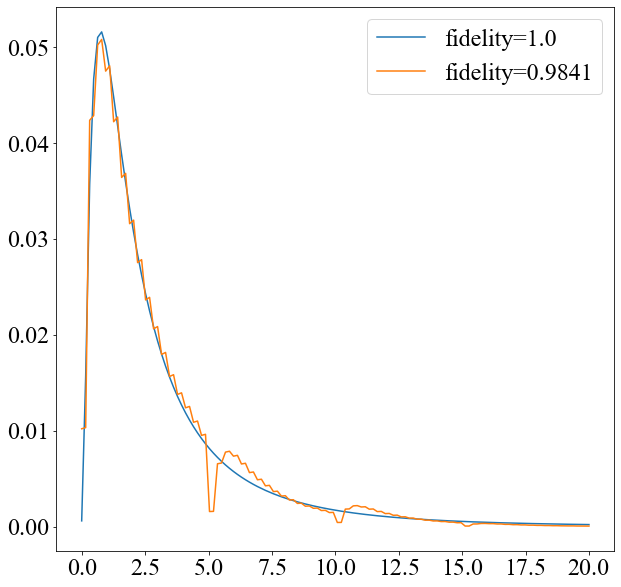

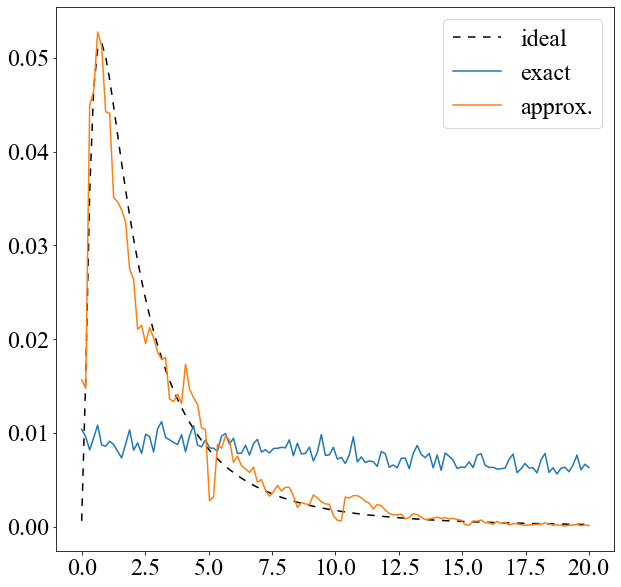

In [41]:
scale = 2

pdf_name = f'lognormal'
y = stats.lognorm.pdf(x, s=1, scale=scale)
cdf_plus = stats.lognorm.cdf(x+d, s=1, scale=scale)
cdf_minus = stats.lognorm.cdf(x-(s-d), s=1, scale=scale)

pmf = cdf_plus - cdf_minus

experiment_ideal(pmf, pdf_name, '_ideal')
experiment_noisy(pmf, pdf_name, '_noisy')

# Normal

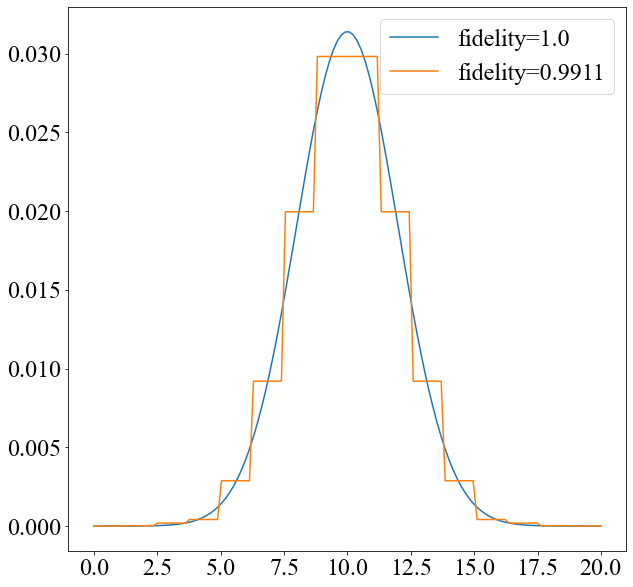

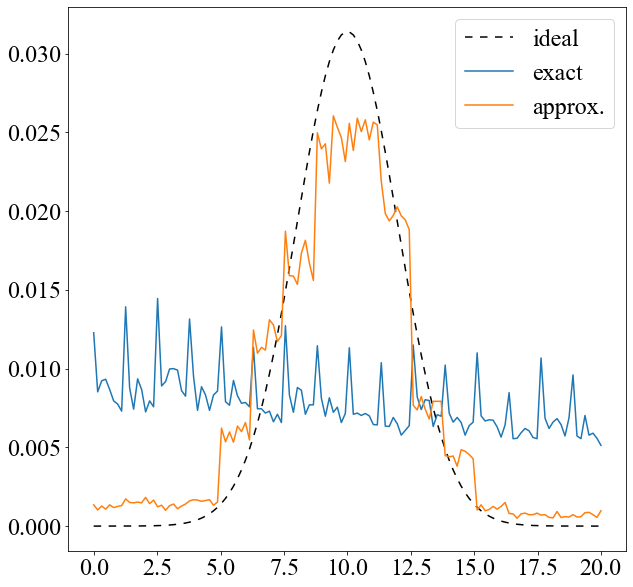

In [31]:
scale = 2
loc = x[-1]//2

pdf_name = f'normal'
y = stats.norm.pdf(x, scale=2, loc=loc)
cdf_plus = stats.norm.cdf(x+d, scale=2, loc=loc)
cdf_minus = stats.norm.cdf(x-(s-d), scale=2, loc=loc)

pmf = cdf_plus - cdf_minus

experiment_ideal(pmf, pdf_name, '_ideal')
experiment_noisy(pmf, pdf_name, '_noisy')

# Laplace

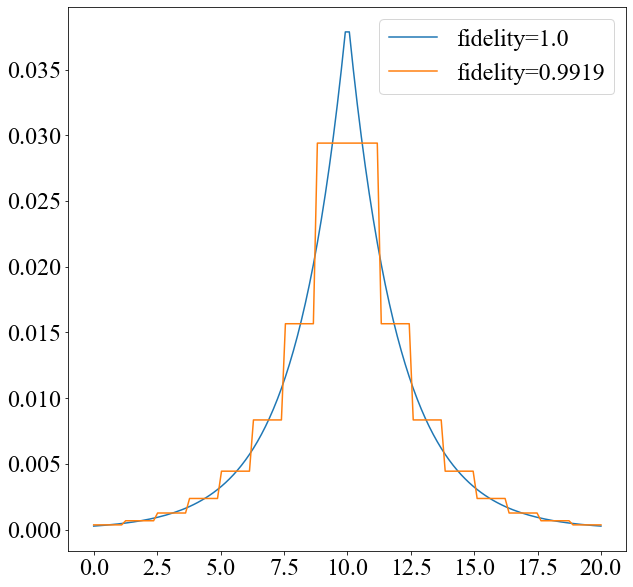

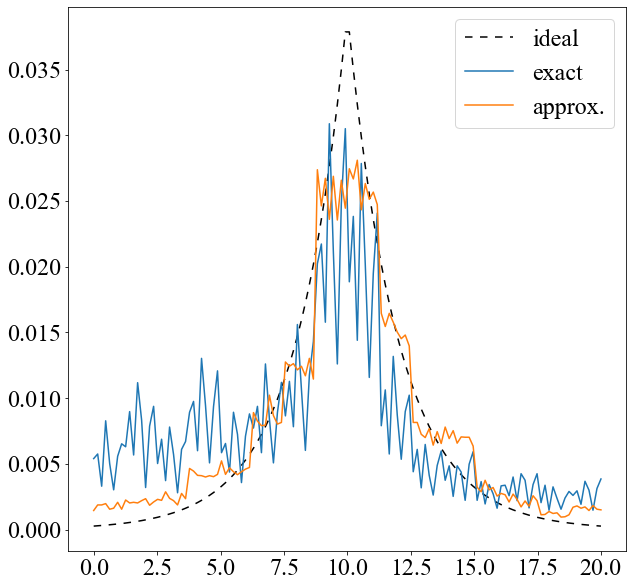

In [33]:
scale = 2
loc = x[-1]//2

pdf_name = f'laplace'
y = stats.laplace.pdf(x, scale=2, loc=loc)
cdf_plus = stats.laplace.cdf(x+d, scale=2, loc=loc)
cdf_minus = stats.laplace.cdf(x-(s-d), scale=2, loc=loc)

pmf = cdf_plus - cdf_minus

experiment_ideal(pmf, pdf_name, '_ideal')
experiment_noisy(pmf, pdf_name, '_noisy')

# Semicircular

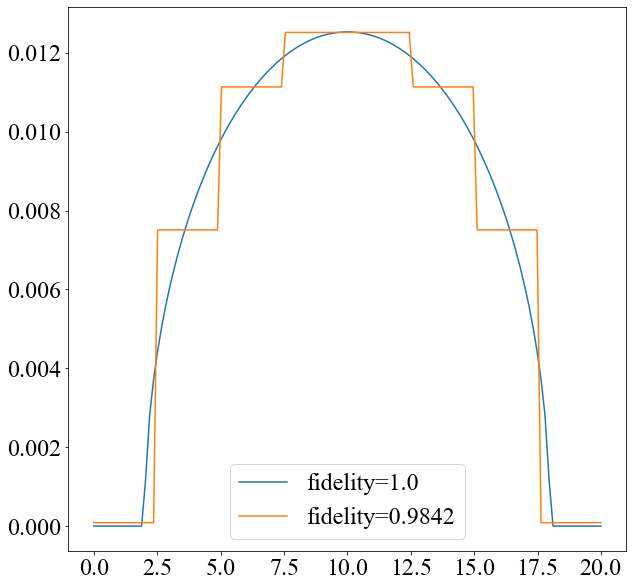

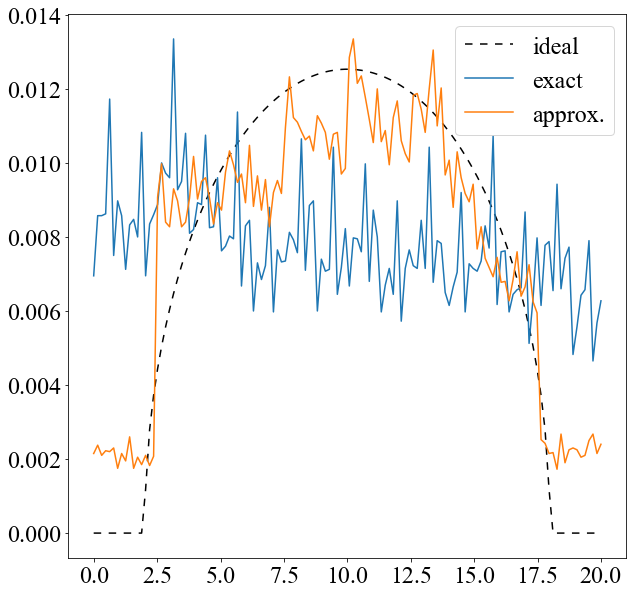

In [37]:
scale = 8
loc = x[-1]//2

pdf_name = f'semicircular'
y = stats.semicircular.pdf(x, scale=scale, loc=loc)
cdf_plus = stats.semicircular.cdf(x+d, scale=scale, loc=loc)
cdf_minus = stats.semicircular.cdf(x-(s-d), scale=scale, loc=loc)

pmf = cdf_plus - cdf_minus

experiment_ideal(pmf, pdf_name, '_ideal')
experiment_noisy(pmf, pdf_name, '_noisy')